In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('car_evaluation.csv')

In [3]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
df.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
X=df.iloc[:,:-1]

In [8]:
y=df.iloc[:,-1]

In [9]:
Y=df['class']

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,random_state=42,test_size=0.33)

In [11]:
pip install category-encoders

Note: you may need to restart the kernel to use updated packages.


In [12]:
import category_encoders as ce

In [13]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [14]:
encoder=ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])

In [15]:
xtrain=encoder.fit_transform(xtrain)

In [16]:
xtest=encoder.fit_transform(xtest)

In [17]:
xtrain.head()


,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rfc=RandomForestClassifier(random_state=0)

In [20]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(random_state=0)

In [21]:
new_predict=rfc.predict(xtest)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
print(accuracy_score(ytest,new_predict))

0.7403508771929824


In [24]:
df_test=pd.DataFrame(columns=['estimator','accuracy'])

In [25]:

estimator=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,100]
for i in estimator:
    rfc=RandomForestClassifier(random_state=0,n_estimators=i)
    rfc.fit(xtrain,ytrain)
    new_predict=rfc.predict(xtest)
    acc=accuracy_score(ytest,new_predict)
    df_test=df_test.append({'estimator':i,'accuracy':acc},ignore_index=True)
    
    
    
    
    

C:\Users\hp\AppData\Local\Temp\ipykernel_13032\3879636112.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test=df_test.append({'estimator':i,'accuracy':acc},ignore_index=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_13032\3879636112.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test=df_test.append({'estimator':i,'accuracy':acc},ignore_index=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_13032\3879636112.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test=df_test.append({'estimator':i,'accuracy':acc},ignore_index=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_13032\3879636112.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

In [26]:
rfc=RandomForestClassifier(random_state=0,n_estimators=70)
rfc.fit(xtrain,ytrain)
new_predict=rfc.predict(xtest)
acc=accuracy_score(ytest,new_predict)
df_test=df_test.append({'estimator':i,'accuracy':acc},ignore_index=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_13032\1781059503.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test=df_test.append({'estimator':i,'accuracy':acc},ignore_index=True)


In [27]:
clf=RandomForestClassifier(n_estimators=70,random_state=0)
clf.fit(xtrain,ytrain)
feature_scores=pd.Series(clf.feature_importances_,index=xtrain.columns).sort_values(ascending=False)

In [28]:
feature_scores

safety      0.297025
persons     0.229080
buying      0.163465
maint       0.132100
lug_boot    0.111630
doors       0.066701
dtype: float64

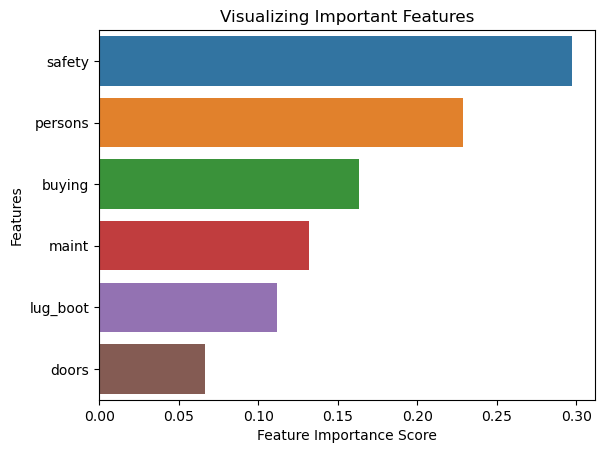

In [29]:
# Creating a seaborn bar plot

import seaborn as sns
sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

In [30]:
x1=df.drop(['doors','class'],axis=1)

In [31]:
y1=df['class']

In [33]:
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,random_state=42,test_size=0.33)

In [34]:
encoder1=ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])

In [35]:
xtrain=encoder1.fit_transform(xtrain)
xtest=encoder1.fit_transform(xtest)

In [36]:
clf2=RandomForestClassifier(random_state=0,n_estimators=100)
clf2.fit(xtrain,ytrain)
pred2=clf2.predict(xtest)
print(accuracy_score(ytest,pred2))

0.7333333333333333


In [ ]:
x2=df.drop(['class'],axis=1)

In [37]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(ytest,pred2))

[[ 65  15  39   8]
 [ 10   2   4   2]
 [ 36   2 351  10]
 [ 16   2   8   0]]


In [38]:
print(classification_report(ytest,pred2))

              precision    recall  f1-score   support

         acc       0.51      0.51      0.51       127
        good       0.10      0.11      0.10        18
       unacc       0.87      0.88      0.88       399
       vgood       0.00      0.00      0.00        26

    accuracy                           0.73       570
   macro avg       0.37      0.38      0.37       570
weighted avg       0.73      0.73      0.73       570

